In [8]:
import pandas as pd
from matplotlib import pyplot as plt
from astropy.table import Table as Tb
%matplotlib notebook

In [3]:
from scipy import stats
import numpy as np

In [4]:
from astropy.time import Time
import astropy.units as u

In [9]:
df = pd.read_excel("0718_2000Microns1stMsmt.xlsx")
df

,Unnamed: 0,Cab.Bridge,Voltage steps,V(PZT),V(PZT).1,Voltage Difference.,real_V,M-E Sensor,ME_D,ME_A_dis,Fringes,Fringe_D,fringe_A_dis,Time
0,NaN,(bit),NaN,(monitor)(before entering code),(after entering code),NaN,NaN,(microns),NaN,NaN,NaN,NaN,NaN,NaN
1,Balance C-Bridge: $H:Z^,29698,NaN,NaN,0.939,NaN,9.39,1859.35,NaN,NaN,NaN,NaN,NaN,10:53:00
2,$H:S:29698:2:30098:70^,30098,400.0,0.947,2.025,1.086,20.25,1865.81,6.46,6.46,21.0,6.6444,6.6444,10:59:00
3,NaN,30498,400.0,1.981,2.783,0.758,27.83,1872.41,6.60,13.06,22.0,6.9608,13.6052,11:02:00
4,NaN,30898,400.0,2.75,3.533,0.750,35.33,1879.08,6.67,19.73,22.0,6.9608,20.5660,11:03:00
5,NaN,31298,400.0,3.487,4.25,0.717,42.50,1885.78,6.70,26.43,20.0,6.3280,26.8940,11:05:00
6,NaN,31698,400.0,4.2,4.96,0.710,49.60,1892.5,6.72,33.15,22.0,6.9608,33.8548,11:07:00
7,NaN,32098,400.0,4.9,5.67,0.710,56.70,1899.26,6.76,39.91,21.0,6.6444,40.4992,11:10:00
8,NaN,32498,400.0,5.61,6.37,0.700,63.70,1906.03,6.77,46.68,21.0,6.6444,47.1436,11:12:00
9,NaN,32898,400.0,6.32,7.06,0.690,70.60,1912.62,6.59,53.27,20.0,6.3280,53.4716,11:15:00


In [10]:
ME_A_dis = df["ME_A_dis"][2:27]
print(ME_A_dis)

2      6.46
3     13.06
4     19.73
5     26.43
6     33.15
7     39.91
8     46.68
9     53.27
10    61.24
11    69.23
12    77.27
13    67.23
14    61.22
15    53.24
16    46.64
17    39.86
18    33.09
19    26.38
20    19.68
21    13.01
22     6.41
23    -0.13
24    -6.65
25   -13.11
26   -19.79
Name: ME_A_dis, dtype: float64


In [11]:
fringe_A_dis = df["fringe_A_dis"][2:27]
print(fringe_A_dis)

2      6.6444
3     13.6052
4     20.5660
5     26.8940
6     33.8548
7     40.4992
8     47.1436
9     53.4716
10    61.3816
11    68.9752
12    77.2016
13    68.3424
14    59.7996
15    51.5732
16    43.9796
17    35.4368
18    27.5268
19    19.9332
20    12.3396
21     5.0624
22    -1.2656
23    -9.1756
24   -16.4528
25   -23.7300
26   -31.9564
Name: fringe_A_dis, dtype: float64


In [12]:
real_V = df["real_V"][2:27]
print(real_V)

2     20.25
3     27.83
4     35.33
5     42.50
6     49.60
7     56.70
8     63.70
9     70.60
10    79.10
11    87.50
12    96.30
13    80.30
14    67.80
15    56.40
16    47.90
17    39.80
18    31.93
19    24.61
20    17.53
21    10.86
22     4.53
23    -1.50
24    -7.31
25   -12.93
26   -18.49
Name: real_V, dtype: float64


In [13]:
time = df["Time"][2:27]
times = []
for t in time:
    times.append("2000-01-01T" + str(t).split("\n")[0])
times = Time(times)
times = (times - times[0]).to_value("s")

In [14]:
x = fringe_A_dis
y = ME_A_dis

In [15]:
info = stats.linregress(x,y)
info

LinregressResult(slope=0.8869526460930279, intercept=6.401953901948016, rvalue=0.9950147933104544, pvalue=1.552708672417668e-24, stderr=0.018536239100578993, intercept_stderr=0.7515674244705844)

<IPython.core.display.Javascript object>


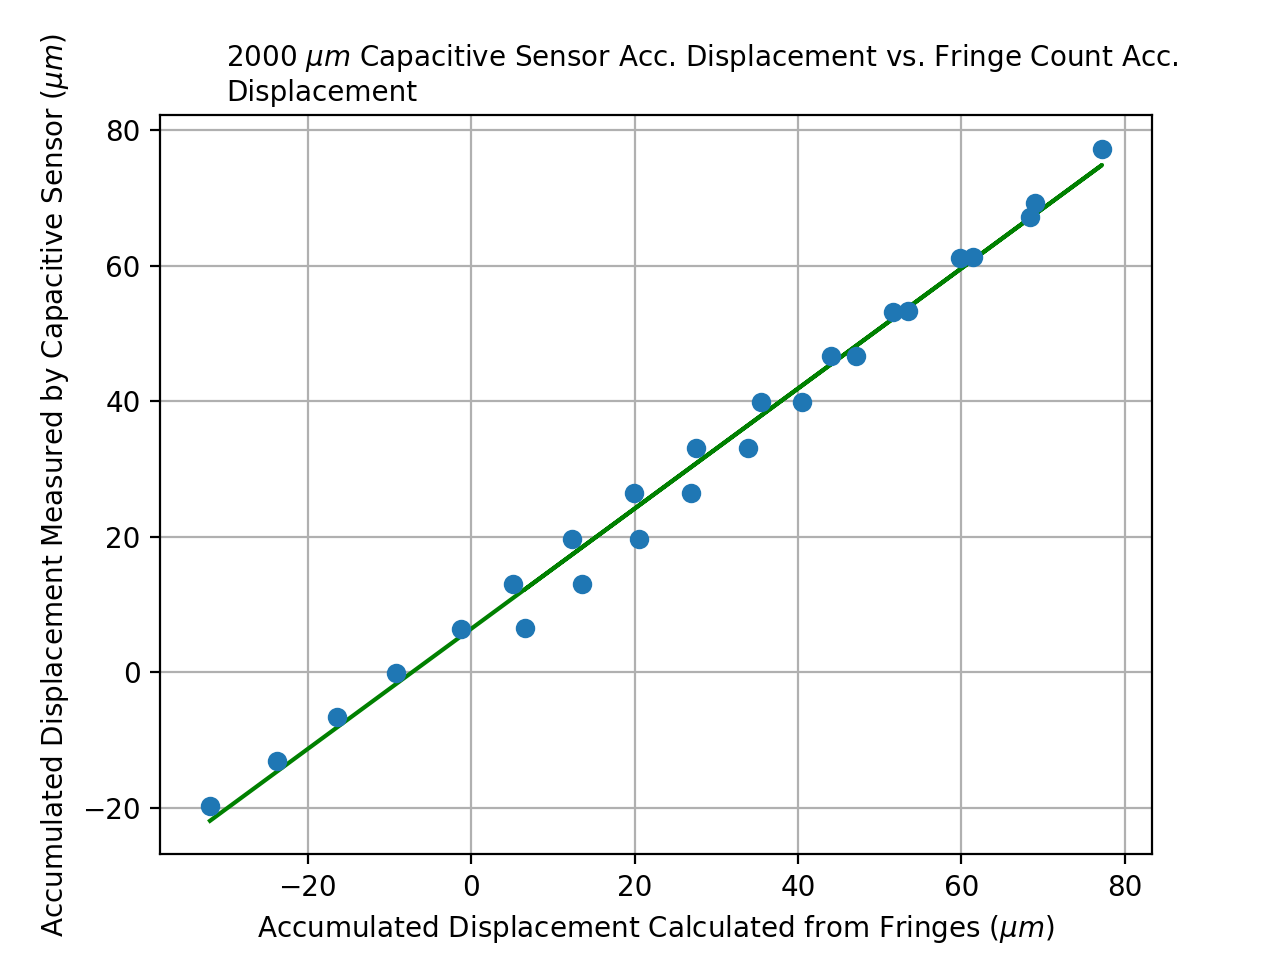

<function matplotlib.pyplot.show(block=None)>

In [16]:
#x error is 0.6
xerror = np.full_like(x,0.6)
yerror = np.full_like(y,0)

# plot of linear regression of data
plt.plot(x,x*info.slope+info.intercept,c = "green")

# plot of fringe displacement data, our "true" measurement
#plt.plot(x,x,c = "red")

plt.errorbar(x,y,xerr=xerror,yerr=yerror,fmt = 'o')#,c = "orange")


plt.xlabel('Accumulated Displacement Calculated from Fringes $(\mu m)$')
plt.ylabel('Accumulated Displacement Measured by Capacitive Sensor $(\mu m)$')

t = '2000 $\mu m$ Capacitive Sensor Acc. Displacement vs. Fringe Count Acc. Displacement'
plt.text(-30, 85, t, ha='left', rotation=0, wrap=True)


plt.grid()
plt.show

<IPython.core.display.Javascript object>


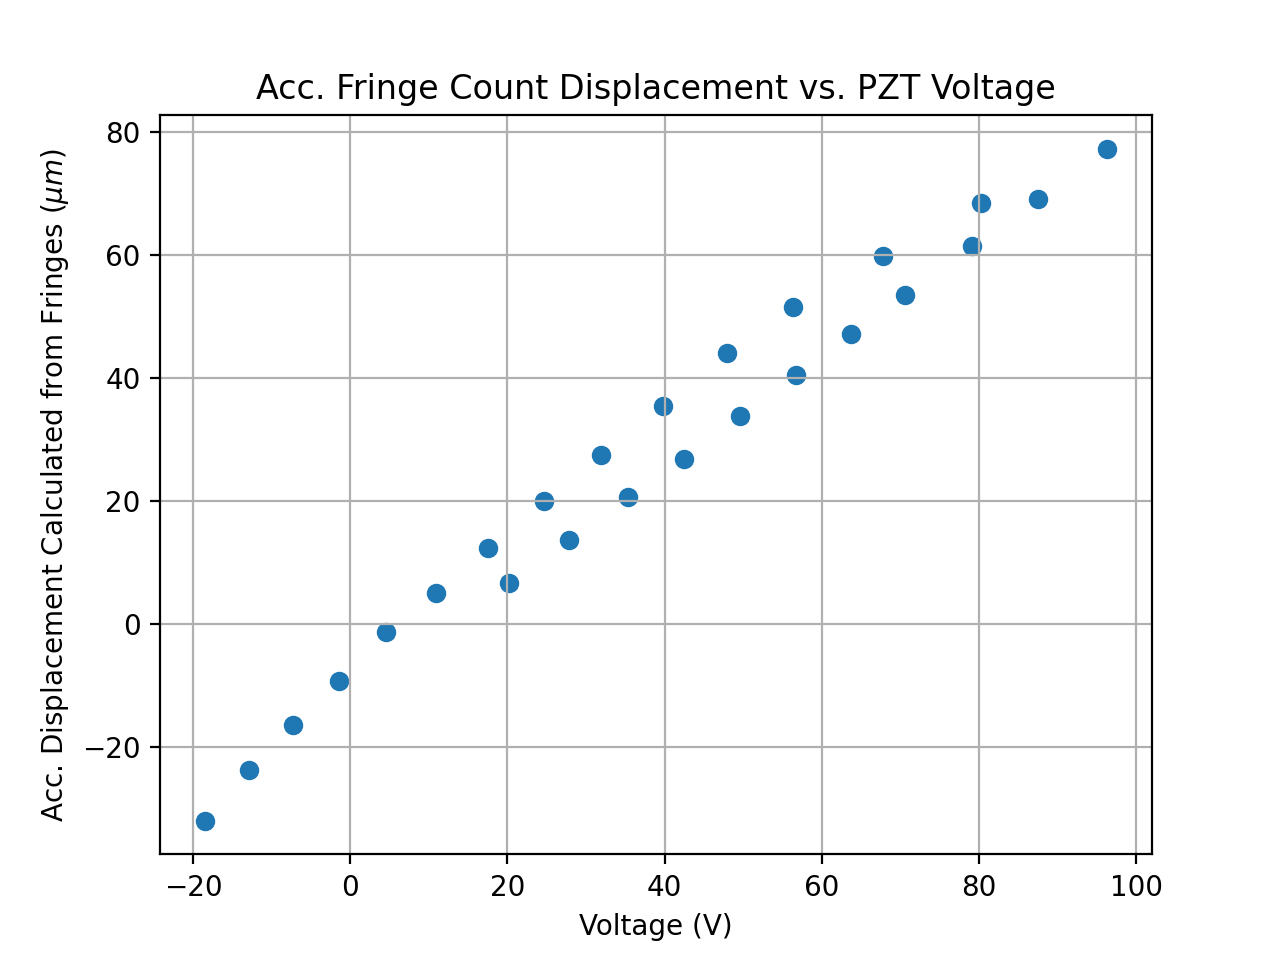

<function matplotlib.pyplot.show(block=None)>

In [17]:
plt.close("all")
x = real_V
y = fringe_A_dis

plt.scatter(x,y)


plt.xlabel('Voltage (V)')
plt.ylabel('Acc. Displacement Calculated from Fringes $(\mu m)$')
plt.title('Acc. Fringe Count Displacement vs. PZT Voltage')


plt.grid()
plt.show

<IPython.core.display.Javascript object>


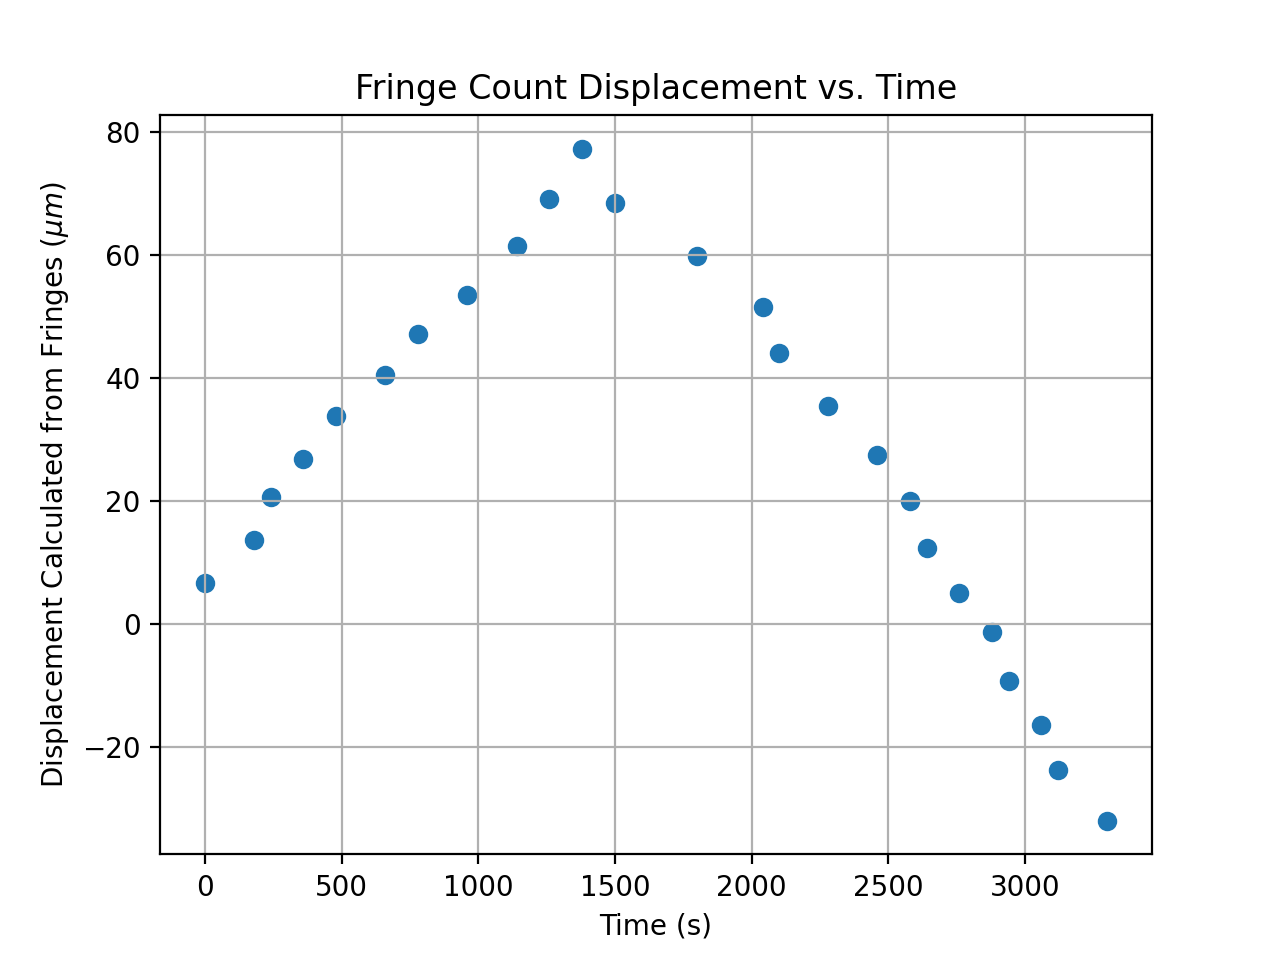

<function matplotlib.pyplot.show(block=None)>

In [26]:
plt.close("all")
x = times
y = fringe_A_dis

plt.scatter(x,y)


plt.xlabel('Time (s)')
plt.ylabel(r'Displacement Calculated from Fringes $(\mu m)$')
plt.title('Fringe Count Displacement vs. Time')


plt.grid()
plt.show